# Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [26]:
ccard_df = pd.read_csv('creditcard.csv')
ccard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Ilistrades the how useless accuracy is in evaluating model's success

In [47]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

labels = ccard_df.columns[:-1]

X = ccard_df[labels]
y = ccard_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.91%


## Below accuracy should have dorped dramaticly becasue only one variable is used to predict the outcome

In [48]:
bnb.fit(X_train[['Amount']], y_train)
y_pred = bnb.predict(X_test[['Amount']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.85%


## In this dataset the two classes are hightly inbalanced that is why when only one variable was used to make predictions, the accuracy did not dorp.

Class 0: 284315
Class 1: 492
Proportion: 577.88 : 1


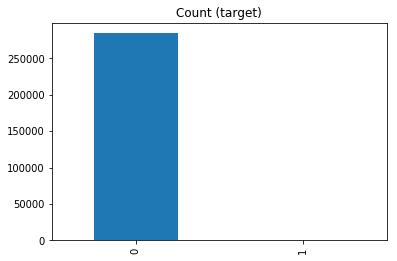

In [39]:
target_count = ccard_df.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');
plt.show()

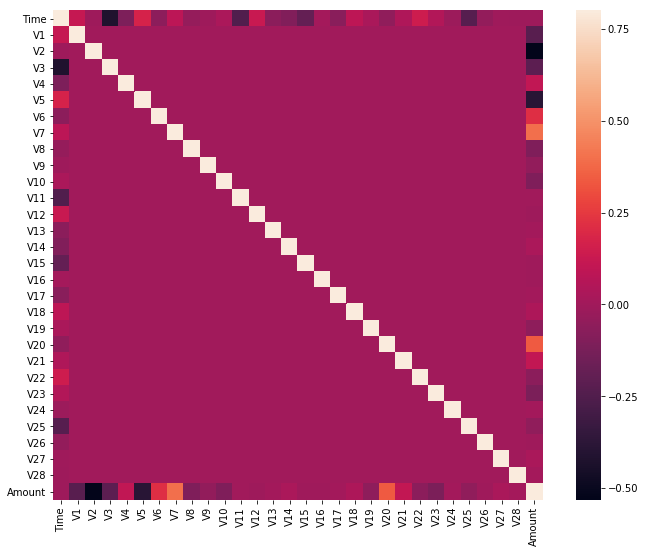

In [31]:
# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = ccard_df.drop('Class',1).corr()
#print(corrmat)
# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# PCA was applied to above data for privacy, except for Class (target variable), time, and amount coulumns.

In [28]:
data = ccard_df.drop('Class', 1)
target = ccard_df['Class']

In [29]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 284807 points : 243


In [30]:
confusion_matrix(target, y_pred)

array([[284246,     69],
       [   174,    318]], dtype=int64)

Using confusion matrix evaluation method we can see how inaccurtly frouds are predicted, a type II error, false negative. We need to improve our false negative for this project. In order to improve our false negative, resampling, a oversampling of minorty class and undersapling of majorty class will be used. 

In [52]:
# Class count
count_class_0, count_class_1 = ccard_df.Class.value_counts()

# Divide by class
df_class_0 = ccard_df[ccard_df['Class'] == 0]
df_class_1 = ccard_df[ccard_df['Class'] == 1]
 

# Random under-sampling

Random under-sampling:
1    492
0    492
Name: Class, dtype: int64


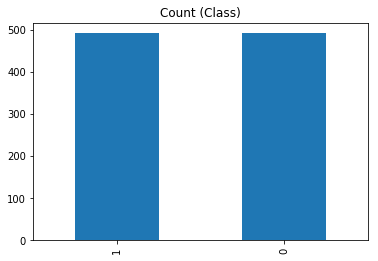

In [60]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

df_test_under.Class.value_counts().plot(kind='bar', title='Count (Class)')
plt.show()

In [72]:
#Create input and outcome variables
data = df_test_under.drop('Class', 1)
target = df_test_under['Class']

#fit the data to the model
bnb.fit(data, target)

#predict using the input data and save the predicted outcomes to a variable
y_pred = bnb.predict(data)

#Evaluate the model using confusion matrix
print("Accurcy of froud detection:" + str(404/(404+88)))
confusion_matrix(target, y_pred)

Accurcy of froud detection:0.8211382113821138


array([[489,   3],
       [ 88, 404]], dtype=int64)

# Random over-sampling

Random over-sampling:
1    284315
0    284315
Name: Class, dtype: int64


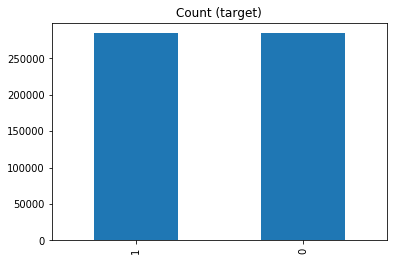

In [63]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

df_test_over.Class.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [74]:
#Create input and outcome variables
data = df_test_over.drop('Class', 1)
target = df_test_over['Class']

#fit the data to the model
bnb.fit(data, target)

#predict using the input data and save the predicted outcomes to a variable
y_pred = bnb.predict(data)

#Evaluate the model using confusion matrix
print("Accurcy of froud detection:" + str(233382/(233382+50933)))
confusion_matrix(target, y_pred)

Accurcy of froud detection:0.8208571478817509


array([[282132,   2183],
       [ 50933, 233382]], dtype=int64)